In [2]:
import numpy as np
from sympy.physics.quantum import TensorProduct
from numpy import linalg as LA
from matplotlib import pyplot as plt
import cmath

In [3]:
X = np.array([[0, 1],
     [1, 0]])
Z = np.array([[1, 0],
     [0, -1]])
I = np.array([[1, 0],
     [0, 1]])

In [4]:
def tensorproduct_via_list(lst):
    product = lst[0]
    for i in range(len(lst)-1):
        product = TensorProduct(product, lst[i+1])
    return product

In [5]:
#Generates the magnetic_term (term X) of Ising models' hamiltonian
#Parameters: int n (number of qubits), float h (magnetic constant)
#Return: the 2D array (2^n * 2^n matrix) of the X term
def X_term(n, h):
    
    def term_i_X(i):
        list_ith = []
        for j in range(n):
            if j == i:
                list_ith.append(X)
            else:
                list_ith.append(I)    
        return tensorproduct_via_list(list_ith)
    
    total = np.zeros((2**n,2**n))
    
    for k in range(n):
        total = total + term_i_X(k)
        
    return -h * total

In [6]:
X_term(2, 2)

array([[-0., -2., -2., -0.],
       [-2., -0., -0., -2.],
       [-2., -0., -0., -2.],
       [-0., -2., -2., -0.]])

In [91]:
#Generates the exchanging term (ZZ term) of Ising Model's Hamiltonian
#Parameters: int n (number of qubits)
#Returns: the 2D array (2^n * 2 ^n matrix) of the ZZ term
def ZZ_term(n):
    if n ==1:
        return np.array([[0,0], [0,0]])
    
    #Generates list_ith = [I, ..., I,  Z, Z, I, ... ,I]
    def term_i_ZZ(i):
        
        list_ith = []
        for j in range(n):
            if j == i or j == i+1:
                list_ith.append(Z)
            else:
                list_ith.append(I)
        
        return tensorproduct_via_list(list_ith)

    total = np.zeros((2**n,2**n))
    
    for k in range(n-1):
        total = total + term_i_ZZ(k)
    
    
    
    #Generates list_edge = [Z, I, I, ..., I, I, Z]
    list_edge = []
    for j in range(n):
        if j == 0 or j == n-1:
            list_edge.append(Z)
        else:
            list_edge.append(I)
    
    total = total + tensorproduct_via_list(list_edge)
    return -total

In [93]:
ZZ_term(2)

array([[-2., -0., -0., -0.],
       [-0.,  2., -0., -0.],
       [-0., -0.,  2., -0.],
       [-0., -0., -0., -2.]])

In [97]:
#Generates the Hamiltonian of the ising system
#Parameters: int n (number of qubits), float h (magnetic constant)
def get_ising_hamiltonian_matrix(n,h):
    def X_term(n, h):
    
        def term_i_X(i):
            list_ith = []
            for j in range(n):
                if j == i:
                    list_ith.append(X)
                else:
                    list_ith.append(I)    
            return tensorproduct_via_list(list_ith)
    
        total = np.zeros((2**n,2**n))
    
        for k in range(n):
            total = total + term_i_X(k)
        
        return -h * total
    def ZZ_term(n):
        if n ==1:
            return np.array([[0,0], [0,0]])
    #Generates list_ith = [I, ..., I,  Z, Z, I, ... ,I]
        def term_i_ZZ(i):
        
            list_ith = []
            for j in range(n):
                if j == i or j == i+1:
                    list_ith.append(Z)
                else:
                    list_ith.append(I)
        
            return tensorproduct_via_list(list_ith)

        total = np.zeros((2**n,2**n))
    
        for k in range(n-1):
            total = total + term_i_ZZ(k)
    
    
    
        #Generates list_edge = [Z, I, I, ..., I, I, Z]
        list_edge = []
        for j in range(n):
            if j == 0 or j == n-1:
                list_edge.append(Z)
            else:
                list_edge.append(I)
    
        total = total + tensorproduct_via_list(list_edge)
        return -total
    
    H = ZZ_term(n) + X_term(n,h)
    return H

In [14]:
H_3_2 = get_ising_hamiltonian_matrix(3,2)
print(H_3_2)

[[-3. -2. -2. -0. -2. -0. -0. -0.]
 [-2.  1. -0. -2. -0. -2. -0. -0.]
 [-2. -0.  1. -2. -0. -0. -2. -0.]
 [-0. -2. -2.  1. -0. -0. -0. -2.]
 [-2. -0. -0. -0.  1. -2. -2. -0.]
 [-0. -2. -0. -0. -2.  1. -0. -2.]
 [-0. -0. -2. -0. -2. -0.  1. -2.]
 [-0. -0. -0. -2. -0. -2. -2. -3.]]


In [17]:
class Hamiltonian():
    def __init__(self, hamiltonian_matrix):
        self.matrix = hamiltonian_matrix
        self.eigenstate = LA.eig(self.matrix)
        self.energy = LA.eig(self.matrix)[0]
        
        min_energy = self.energy[0]
        min_energy_idx = 0
        for i in range(len(self.energy)):
            if self.energy[i] < min_energy:
                min_energy = self.energy[i]
                min_energy_idx = i
        
        self.min_energy = min_energy   
        self.ground_state = LA.eig(self.matrix)[1][:, min_energy_idx]

class Ising_Hamiltonian(Hamiltonian):
    def __init__(self, num_qubits, h = 1):
        self.num_qubits = num_qubits
        self.h = h
        self.matrix = get_ising_hamiltonian_matrix(num_qubits, h)
        Hamiltonian.__init__(self, self.matrix)


In [104]:
H = Ising_Hamiltonian(1,2)
H.min_energy

-1.9999999999999996

In [98]:
h_range = np.linspace(0,2,20)
with open('Exact_E_range.txt', 'w') as outfile:

    for n in range(1, 5, 1):
        E_range = []
        for h in h_range:
            H = Ising_Hamiltonian(num_qubits = n, h = h)
            E_range.append(H.min_energy)
            
        E_range = list(map(lambda x: x/n, E_range))
        
        for i in range(len(E_range)-1):
            outfile.write('{ground_energy} '.format(ground_energy = E_range[i]))
        outfile.write('{}\n'.format(E_range[-1]))

In [99]:
def get_E_range(file, n):
    with open(file, 'r') as infile:
        for i in range(1, n+1):
            line = infile.readline().split(' ')
    E_range = []
    for element in line:
        E_range.append(complex(element))
        
    return E_range

In [100]:
get_E_range('Exact_E_range.txt', 3)

[(-1+0j),
 (-1.0029172392991268+0j),
 (-1.012257949926227+0j),
 (-1.0288632926758146+0j),
 (-1.0534284786616952+0j),
 (-1.0863886888826075+0j),
 (-1.1278356834067804+0j),
 (-1.177499021376562+0j),
 (-1.2348002109808474+0j),
 (-1.2989564623667418+0j),
 (-1.369095484068181+0j),
 (-1.4443501164832224+0j),
 (-1.5239197262968904+0j),
 (-1.6071003647530555+0j),
 (-1.6932925195185922+0j),
 (-1.7819957493399936+0j),
 (-1.872797183492377+0j),
 (-1.9653582149735949+0j),
 (-2.059401681437348+0j),
 (-2.1547005383792515+0j)]

In [101]:
h_range = np.linspace(0,2,20)

Exact_E_range_1 = get_E_range('Exact_E_range.txt', 1)
Exact_E_range_2 = get_E_range('Exact_E_range.txt', 2)
Exact_E_range_3 = get_E_range('Exact_E_range.txt', 3)


/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'E/N')

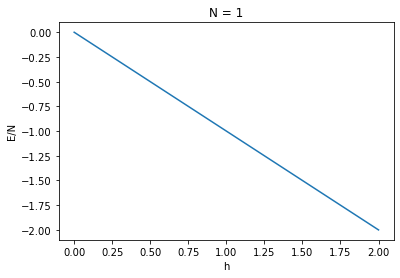

In [102]:
plt.plot(h_range, Exact_E_range_1)
plt.title('N = 1')
plt.xlabel('h')
plt.ylabel('E/N')

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'E/N')

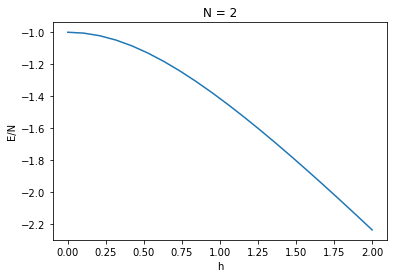

In [81]:
plt.plot(h_range, Exact_E_range_1)
plt.title('N = 2')
plt.xlabel('h')
plt.ylabel('E/N')

In [83]:
def sorted_bit_str_list(n):
    bit_str_lst = []
    
    for i in range( 2**n ):
        bit_str = ''
        rev_bit_str = ''
        temp = i
        
        for j in range(n):
            rev_bit_str += str(temp % 2)
            temp = temp // 2
            
        for char in rev_bit_str:
            bit_str = char + bit_str
        
        bit_str_lst.append(bit_str)
    return bit_str_lst

def bit_str_to_dec(bit_str):
    dec = 0
    for i in range(len(bit_str)-1, -1,-1):
        bit = int(bit_str[i])
        dec += bit * ( 2 ** (len(bit_str) - 1 - i) )
        
    return dec

def final_coefficient(bit_str, theta_list):
    coeff = 1
    for i in range(len(bit_str)-1, -1, -1):
        code = '1' + bit_str[:i]
        num = bit_str_to_dec(code) - 1
        
        if bit_str[i] == '0':
            coeff *= np.cos(theta_list[num]/2)
        else:
            coeff *= np.sin(theta_list[num]/2)
    return coeff

In [85]:
num_qubits = 3
theta_list1 = [1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966]
theta_list2 = [1.5707963267948966,
 1.2309594060858275,
 1.9106332475039658,
 1.047197537412159,
 1.5707963267948966,
 1.5707963267948966,
 2.094395116177634]

lst = sorted_bit_str_list(num_qubits)
prob_list = []
count = dict()
for element in lst:
    count[element] = final_coefficient(element, theta_list2)
    

x = np.array(list(count.values()))

print(x)

[0.5        0.28867513 0.28867513 0.28867513 0.28867513 0.28867513
 0.28867513 0.5       ]


In [186]:
def complex
def get_theta_list(state):
    theta_list = []
    
    while len(state)>1:
        
        add_theta = []
        for j in range(int(len(state)/2)):
            if state[2 * j + 1] == 0:
                add_theta.append(np.pi)
            else:
                add_theta.append(2 * np.arctan(state[2*j+1]/state[2*j]))
        
        theta_list = add_theta + theta_list
        
        new_state = []
        for j in range(int(len(state)/2)):
            new_state.append(np.sqrt(state[2*j]**2 + state[2*j+1]**2))
    
        state = new_state
    
    return theta_list
        

In [185]:
A = [-0.5, -0.28867513, -0.28867513, -0.28867513, -0.28867513, -0.28867513, -0.28867513, -0.5]
get_theta_list(A)

[1.5707963267948966,
 1.2309594060858275,
 1.9106332475039658,
 1.047197537412159,
 1.5707963267948966,
 1.5707963267948966,
 2.094395116177634]